<a href="https://colab.research.google.com/github/epistemologist/ColabNotebooks/blob/main/XOR_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some experimentation with the [XOR problem](https://dev.to/jbahire/demystifying-the-xor-problem-1blk)

### 1 layer network
The following is a sketch of a one layer network (no hidden nodes)
![](https://i.imgur.com/nZzap0w.png)

This cannot model XOR as XOR is not linearly seperable - we need more layers:

### 2 layer network
![](https://i.imgur.com/IaNov89.png)

Here, we have that

$n_1 = \sigma(\alpha_{11} x_1 + \alpha_{12} x_2)$

$n_2 = \sigma(\alpha_{21} x_1 + \alpha_{22} x_2)$

$n_3 = [ \beta_1 n_1 + \beta_2 n_2 > 0] $

here, $\sigma$ is our activation function - we will use ReLU for simplicity

With a random search, we can get a network that fits XOR

# New Section

In [75]:
from random import uniform, seed
seed(60)

relu = lambda x:  int(x > 0) * abs(x)

def simulate_network():
    a11 = uniform(-1, 1)
    a12 = uniform(-1, 1)
    a21 = uniform(-1, 1)
    a22 = uniform(-1, 1)
    b1 = uniform(-1, 1)
    b2 = uniform(-1, 1)

    params = (a11, a12, a21, a22, b1, b2)
    def run_network(x1, x2):
        n1 = relu(a11 * x1 + a12 * x2)
        n2 = relu(a21 * x1 + a22 * x2)
        n3 = int( b1 * n1 + b2 * n2 > 0)
        return n3
    return (params, run_network)

from collections import defaultdict
from tqdm import tqdm
results = defaultdict(set)
for _ in tqdm(range(10000)):
    params, run_network = simulate_network()
    network_results = tuple( [run_network(*i) for i in  [(0,0), (0,1), (1,0), (1,1)]] )
    if network_results == (0,1,1,0):
        print(params); break
    results[network_results].add(params)

for k, v in results.items():
    print(k, len(v))

  4%|▍         | 388/10000 [00:00<00:00, 33570.35it/s]

(0.346403890783763, -0.6986700023590691, -0.8888902327544514, 0.30517946904970983, 0.8220882728115857, 0.5147686454572942)
(0, 0, 0, 0) 161
(0, 1, 1, 1) 96
(0, 1, 0, 1) 39
(0, 1, 0, 0) 32
(0, 0, 1, 1) 28
(0, 0, 1, 0) 30
(0, 0, 0, 1) 2


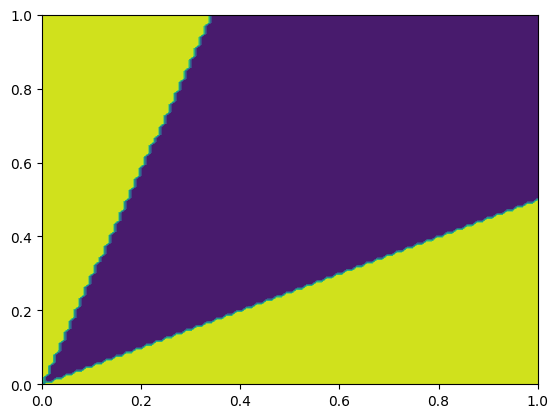

In [60]:
def plot_params(params):
    (a11, a12, a21, a22, b1, b2) = params
    def run_network(x1, x2):
        n1 = relu(a11 * x1 + a12 * x2)
        n2 = relu(a21 * x1 + a22 * x2)
        n3 = int( b1 * n1 + b2 * n2  > 0 )
        return n3

    import matplotlib.pyplot as plt
    import numpy as np
    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = np.vectorize(run_network)(X1, X2)
    plt.contourf(X1, X2, Y)
    plt.show()

plot_params((0.346403890783763, -0.6986700023590691, -0.8888902327544514, 0.30517946904970983, 0.8220882728115857, 0.5147686454572942))

The XOR network is a combination of two linear classifiers - we plot some other networks as well:

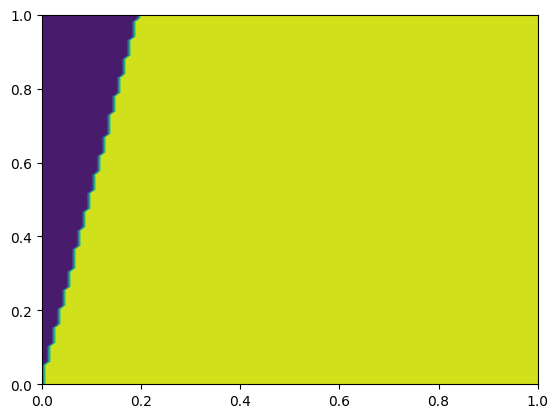

In [66]:
# (0,0,1,1)
plot_params((-0.6193157609997955, 0.13876376798358847, 0.808417493599237, -0.12743671894819308, -0.19915222284154876, 0.12445396644087614))

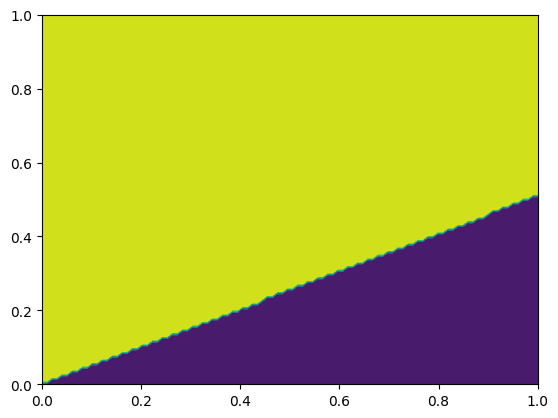

In [70]:
# (0,1,0,1)
plot_params((-0.45108638605516815, 0.882518741823415, -0.7435323490636814, 0.8038921096363263, 0.8063473229423206, -0.5924031923453068))

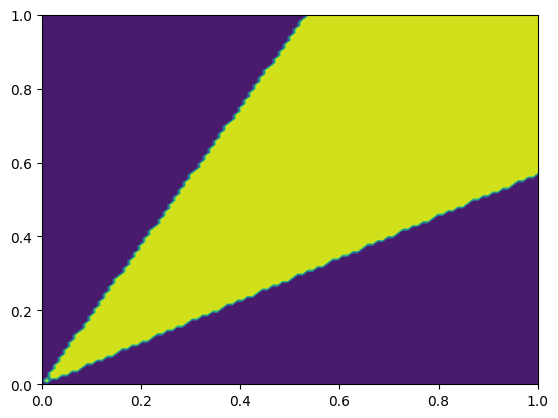

In [74]:
# (0,0,0,1)
plot_params((0.5571898708004954, -0.7281168517355685, 0.633019146229898, -0.33909880105357537, -0.9272301221294501, 0.3000278157330365))